## Import

In [28]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import numpy as np
import csv
import pandas as pd
from PIL import Image

## Utils

In [26]:
def calculate_building_area(rle_img_path):
    
    # 이미지 로드
    image = cv2.imread(rle_img_path, cv2.IMREAD_GRAYSCALE)
    
    # 이미지의 너비와 높이를 가져옵니다.
    height, width = image.shape

    allPixel=0
    white=0

    # 이미지의 모든 픽셀을 순회하며 접근합니다.
    for y in range(height):
        for x in range(width):
            # (x, y) 좌표의 픽셀 값을 가져옵니다.
            pixel_value = image[y, x]

            allPixel+=1
            if pixel_value==255:
                white+=1
            else:
                continue

    # print("all_pixel:",allPixel,"building_pixel:",white)

    ratio = white / allPixel * 100.0

    return ratio

def rle_to_mask(rle, shape):
    """
    RLE 형식의 마스크를 이미지로 변환하는 함수
    :param rle: RLE 형식의 마스크
    :param shape: 이미지의 형태 (높이, 너비)
    :return: 변환된 이미지
    """
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    rle_list = rle.split()
    starts = rle_list[::2]
    lengths = rle_list[1::2]

    for start, length in zip(starts, lengths):
        start = int(start) - 1
        length = int(length)
        mask[start:start + length] = 255

    mask = mask.reshape((shape[0], shape[1]))
    #픽셀값 범위조정
    mask_image = Image.fromarray(mask, mode='L')

    return mask_image

def csv_to_mask_img(reader,image_path,save_path):
    image_list=os.listdir(image_path)

    cnt=0
    for line in tqdm(reader):
        # 1행은 넘김
        if line[1]=="img_path":
            continue
        else:
            image= cv2.imread(image_path+image_list[cnt], cv2.IMREAD_GRAYSCALE) #불러오기
            rle=line[2]
            h,w=image.shape
            img_shape=(h,w)

            # RLE 형식의 마스크를 이미지로 변환
            mask_image = rle_to_mask(rle, img_shape)
            
            mask_image.save(f"{save_path}{line[0]}.png")

        cnt+=1

## Image in csv to destination folder

In [24]:
csv_path="./train_80percent.csv"

# 이미지를 복사할 폴더 경로
destination_folder = './train_img_80percent/'

# CSV 파일 읽기
df = pd.read_csv(csv_path)

# 각 이미지에 대해 작업 수행
for _, row in tqdm(df.iterrows()):
    img_id = row['img_id']
    img_path = row['img_path']

    # 이미지를 목적지 폴더로 복사
    destination_path = os.path.join(destination_folder, f'{img_id}.png')
    shutil.copy(img_path, destination_path)

# 작업 완료 메시지 출력
print("이미지 복사 완료.")

5712it [07:37, 12.49it/s]

이미지 복사 완료.


## Image to RLE mask image

In [30]:
csv_file="./train_80percent.csv"
train_image_path="./train_img_80percent/"
rle_save_path="./rle_img_80percent/"

reader=[]
# csv 파일 정보 접근
if os.path.isfile(csv_file): # csv 파일 존재할때만 실행
    with open(csv_file, 'r') as f: # csv 열기
        reader = csv.reader(f) # csv 파일 읽기
        reader=list(reader) # csv 파일 list로 변경

    csv_to_mask_img(reader,train_image_path,rle_save_path)

100%|██████████| 5713/5713 [03:45<00:00, 25.35it/s]


## Calculate Ratio 

In [65]:
# 이미지 경로 설정
mask_folder_path = "./rle_img/"

mask_list = os.listdir(mask_folder_path)

area_count = [0] * 100

# Parse the original CSV file
with open('train.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)  # Skip the header row
    # rows_to_keep_1percent = []
    # rows_to_keep_2percent = []
    # rows_to_keep_3percent = []
    rows_to_keep_5percent = []
    # rows_to_keep_8percent = []
    # rows_to_keep_10percent = []
    # rows_to_keep_6percent = []
    # rows_to_keep_7percent = []

    
    for row in tqdm(csv_reader):
        img_id, img_path, mask = row[0], row[1], row[2]

        rle_mask_path=img_path.replace("train_img","rle_img")
        # print(rle_mask_path)
        ratio = calculate_building_area(rle_mask_path)
        # print("rle mask path:",rle_mask_path,"ratio:",ratio)

        unit = int(ratio)
        area_count[unit] += 1

        # if unit>6:
        #     rows_to_keep_6percent.append(row)
        
        # if unit>7:
        #     rows_to_keep_7percent.append(row)


        # if unit>1:
        #     rows_to_keep_1percent.append(row)
        
        # if unit>2:
        #     rows_to_keep_2percent.append(row)
        
        # if unit>3:
        #     rows_to_keep_3percent.append(row)

        if unit>5:
            rows_to_keep_5percent.append(row)

        # if unit>8:
        #     rows_to_keep_8percent.append(row)

        # if unit>10:
        #     rows_to_keep_10percent.append(row)

# print("각 면적당 이미지 개수:", area_count)

7140it [1:37:43,  1.22it/s]


## Make New CSV File

In [66]:
# csv_1percent_path = "./train_img_except_1percent.csv"
# csv_2percent_path = "./train_img_except_2percent.csv"
# csv_3percent_path = "./train_img_except_3percent.csv"
csv_5percent_path = "./train_all_img_except_5percent.csv"
# csv_8percent_path = "./train_img_except_8percent.csv"
# csv_10percent_path = "./train_img_except_10percent.csv"

# csv_6percent_path = "./train_img_except_6percent.csv"
# csv_7percent_path = "./train_img_except_7percent.csv"

# # Write the filtered rows to the new CSV file
# with open(csv_6percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_6percent)

# # Write the filtered rows to the new CSV file
# with open(csv_7percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_7percent)


# # Write the filtered rows to the new CSV file
# with open(csv_1percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_1percent)

# # Write the filtered rows to the new CSV file
# with open(csv_2percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_2percent)

# # Write the filtered rows to the new CSV file
# with open(csv_3percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_3percent)

# Write the filtered rows to the new CSV file
with open(csv_5percent_path, 'w', newline='') as new_csv_file:
    csv_writer = csv.writer(new_csv_file)
    csv_writer.writerow(header)
    csv_writer.writerows(rows_to_keep_5percent)

# # Write the filtered rows to the new CSV file
# with open(csv_8percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_8percent)

# # Write the filtered rows to the new CSV file
# with open(csv_10percent_path, 'w', newline='') as new_csv_file:
#     csv_writer = csv.writer(new_csv_file)
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows_to_keep_10percent)

In [69]:
print(area_count)
print(len(rows_to_keep_5percent))

[0, 1358, 905, 676, 673, 599, 586, 458, 416, 373, 268, 215, 166, 114, 94, 69, 38, 17, 23, 25, 9, 13, 9, 6, 6, 3, 5, 0, 2, 4, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2929


In [67]:
cnt=0
for i in area_count:
    cnt+=i
print(cnt)

7140


## Make Graph

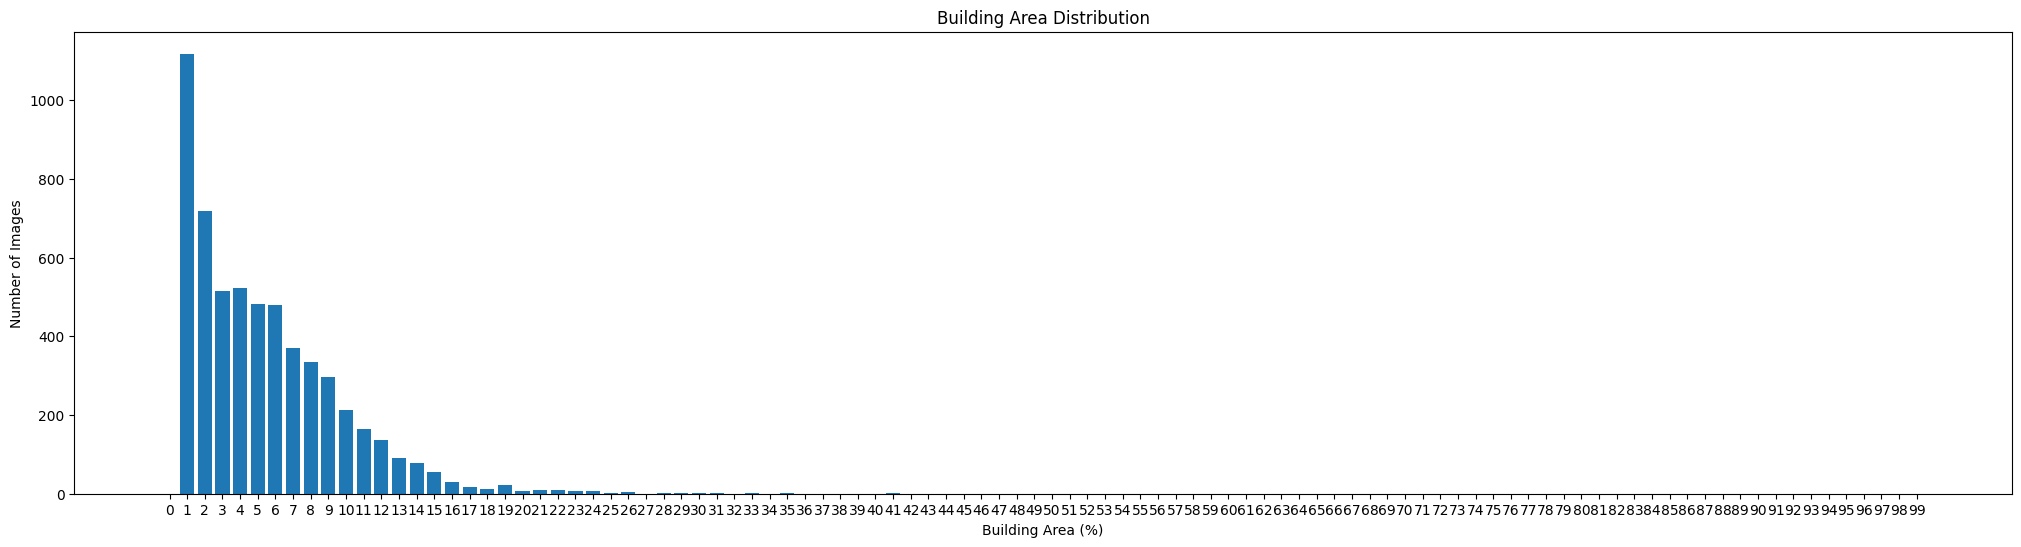

In [48]:
# # 그래프 그리기
# x = range(0, 100, 1)
# y = area_count

# plt.bar(x, y)
# plt.xlabel('Building Area (%)')
# plt.ylabel('Number of Images')
# plt.xticks(x)
# plt.title('Building Area Distribution')
# plt.show()

plt.figure(figsize=(25, 6))  # 그래프의 크기를 조정합니다. (가로, 세로)

x = range(0, 100, 1)
y = area_count

plt.bar(x, y)
plt.xlabel('Building Area (%)')
plt.ylabel('Number of Images')
plt.xticks(x)
plt.title('Building Area Distribution')
plt.show()